## Extract features from posters

[Download poster images](#tag1)

[Extract number of faces from posters](#tag2)

[Extract major colors from posters](#tag3)

<a id ='tag1'></a>
### Download poster images from json file

Below is the code used to download movie posters. (It takes about 2 hr to download all the posters)

In [2]:
import json
with open('imdb_output.json', 'r') as f:
    out = json.load(f)

In [3]:
from bs4 import BeautifulSoup
import requests
import re
import urllib
import os
import numpy as np
import PIL
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

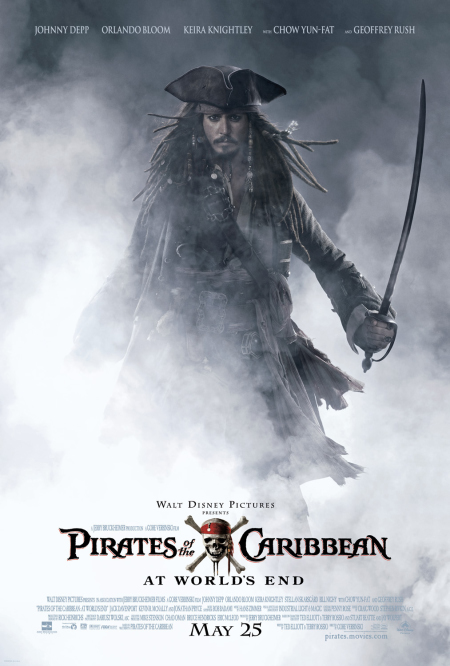

In [4]:
from IPython.display import Image
from IPython.core.display import HTML 
Image("./image/1.jpg", width = 200, height = 400)


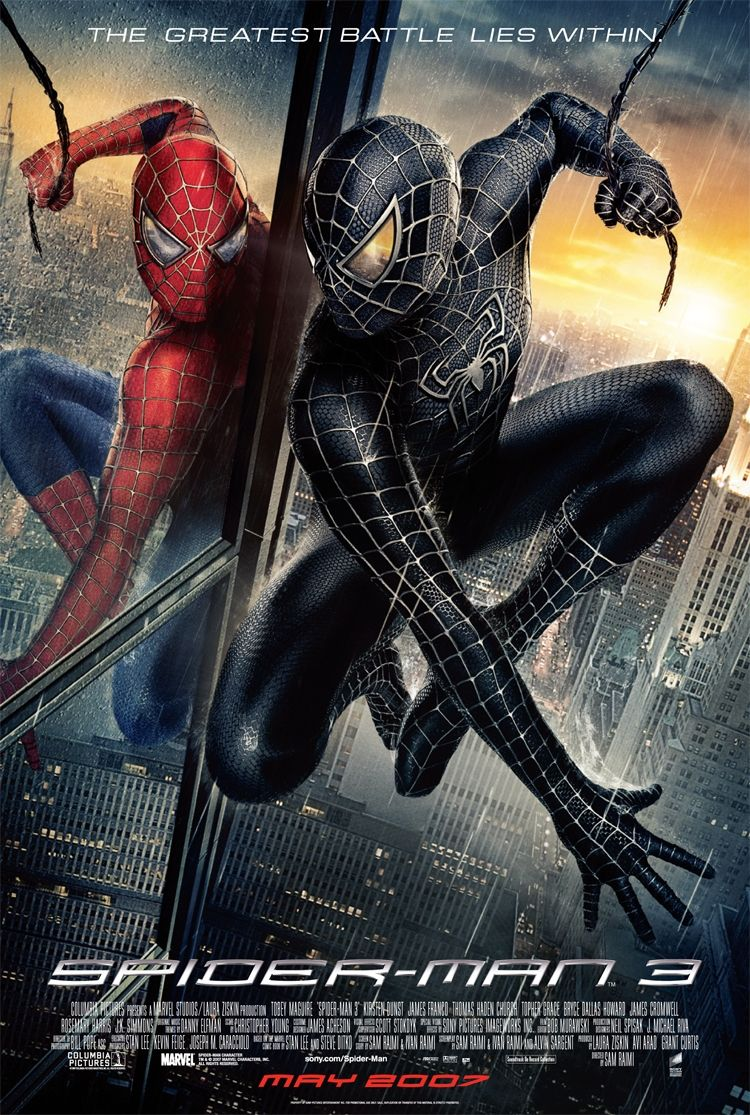

In [5]:
Image("./image/6.jpg", width = 200, height = 400)

<a id ='tag2'></a>
### Extract faces

Since the number of faces is already extracted in the csv file, we start to look at other features of movie posters.

<a id='tag3'></a>
### Exrtact major colors 

Here we tried to use K means to cluster the color of posters and use the RGB value of ***three major colors*** as features.

* Feature engineering: extract 3 major colors -- convert hex code to RGB values -- use all 9 features in the final model for selection (the final model contains two RGB features)

***Below is an example showing the poster and the corresponding major colors.***

In [6]:
from PIL import Image
from collections import namedtuple
from math import sqrt
import random
from matplotlib import patches

In [7]:
p1 = Image.open("./image/3.jpg")
Point = namedtuple('Point', ('coords', 'n', 'ct'))
Cluster = namedtuple('Cluster', ('points', 'center', 'n'))

In [8]:
def get_points(img):
    points = []
    w, h = img.size
    for count, color in img.getcolors(w * h):
        points.append(Point(color, 3, count))
    return points

rtoh = lambda rgb: '#%s' % ''.join(('%02x' % p for p in rgb))

def colorz(filename, n=3):
    img = Image.open(filename)
    img.thumbnail((200, 200))
    w, h = img.size

    points = get_points(img)
    clusters = kmeans(points, n, 1)
    rgbs = [map(int, c.center.coords) for c in clusters]
    return map(rtoh, rgbs)

def euclidean(p1, p2):
    return sqrt(sum([
        (p1.coords[i] - p2.coords[i]) ** 2 for i in range(p1.n)
    ]))

def calculate_center(points, n):
    vals = [0.0 for i in range(n)]
    plen = 0
    for p in points:
        plen += p.ct
        for i in range(n):
            vals[i] += (p.coords[i] * p.ct)
    return Point([(v / plen) for v in vals], n, 1)

def kmeans(points, k, min_diff):
    clusters = [Cluster([p], p, p.n) for p in random.sample(points, k)]

    while 1:
        plists = [[] for i in range(k)]

        for p in points:
            smallest_distance = float('Inf')
            for i in range(k):
                distance = euclidean(p, clusters[i].center)
                if distance < smallest_distance:
                    smallest_distance = distance
                    idx = i
            plists[idx].append(p)

        diff = 0
        for i in range(k):
            old = clusters[i]
            center = calculate_center(plists[i], old.n)
            new = Cluster(plists[i], center, old.n)
            clusters[i] = new
            diff = max(diff, euclidean(old.center, new.center))

        if diff < min_diff:
            break

    return clusters

In [9]:
c1 = kmeans(get_points(p1), 3, min_diff=3)

In [10]:
c1 =list(colorz('./image/1.jpg', n = 3))

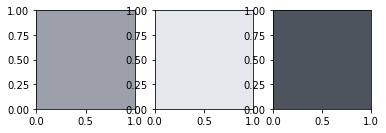

In [11]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(131, aspect='equal')
ax1.add_patch(
    patches.Rectangle((0, 0), 2, 2, color = c1[0]))
ax1 = fig1.add_subplot(132, aspect='equal')
ax1.add_patch(
    patches.Rectangle((0, 0), 2, 2, color = c1[1]))
ax1 = fig1.add_subplot(133, aspect='equal')
ax1.add_patch(
    patches.Rectangle((0, 0), 2, 2, color = c1[2]))

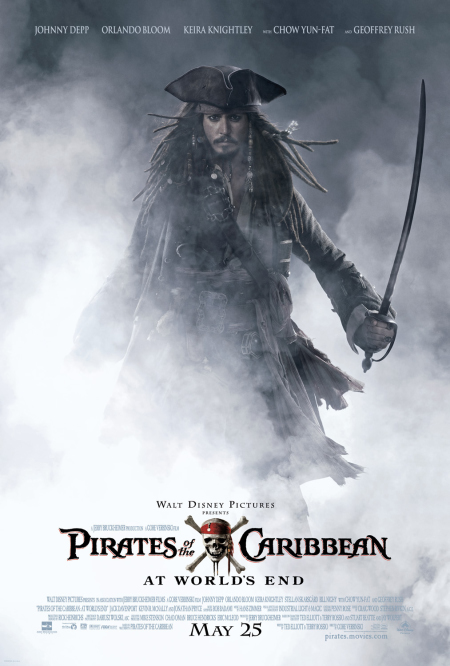

In [12]:
from IPython.display import Image
from IPython.core.display import HTML 
Image("./image/1.jpg", width = 200, height = 400)

This Pirates of Caribbean poster has three major colors as grays.

#### Code for extracting RGB value from major colors extracted by Kmeans

(Takes about 2 hr to extract the features)

reference https://github.com/sundeepblue/movie_rating_prediction/blob/master/detect_faces_from_posters.py

reference http://charlesleifer.com/blog/using-python-and-k-means-to-find-the-dominant-colors-in-images/